In [48]:
import networkx as nx
import pandas as pd
import functools
from collections import Counter
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

In [49]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [50]:
df = pd.read_csv("tweets2009-06-0115.csv.zip", sep='\t', compression='zip')

In [51]:
print("Num of rows:", df.shape[0])

Num of rows: 3437690


In [52]:
df.head()

date        user          tweet
0  2009-06-01 21:43:59  burtonator  No Post Title
1  2009-06-01 21:47:23  burtonator  No Post Title
2  2009-06-02 01:15:44  burtonator  No Post Title
3  2009-06-02 05:17:52  burtonator  No Post Title
4  2009-06-02 23:58:25  burtonator  No Post Title

### Question 1

In [53]:
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

In [54]:
mostcommon=hashTagsCounter.most_common(100)
mostcommon

[('#iranelection', 26853),
 ('#followfriday', 16400),
 ('#jobs', 13322),
 ('#iremember', 11057),
 ('#spymaster', 10587),
 ('#ff', 10446),
 ('#squarespace', 9198),
 ('#tcot', 7691),
 ('#fb', 6107),
 ('#cnnfail', 4451),
 ('#11thcommandment', 3429),
 ('#jtv', 3317),
 ('#140mafia', 3144),
 ('#iran', 2935),
 ('#', 2895),
 ('#news', 2837),
 ('#quote', 2750),
 ('#vampirebite', 2634),
 ('#1', 2587),
 ('#bsb', 2433),
 ('#tweetmyjobs', 2086),
 ('#iphone', 1697),
 ('#lastfm', 1599),
 ('#mp2', 1589),
 ('#niley', 1528),
 ('#music', 1489),
 ('#p2', 1439),
 ('#follow', 1390),
 ('#pawpawty', 1305),
 ('#hhrs', 1256),
 ('#fail', 1246),
 ('#twitter', 1216),
 ('#tlot', 1214),
 ('#facebook', 1177),
 ('#sgp', 1151),
 ('#mashchat', 1143),
 ('#tinychat', 1111),
 ('#2', 1107),
 ('#digg', 1102),
 ('#gop', 1009),
 ('#phish', 1001),
 ('#mlb', 962),
 ('#travel', 932),
 ('#bonnaroo', 887),
 ('#twitpocalypse', 879),
 ('#iranelections', 857),
 ('#rt', 856),
 ('#zensursula', 811),
 ('#jamlegend', 790),
 ('#quotes', 75

In [55]:
redsoxTag = df[df["tweet"].str.lower().str.contains("#tehran", na=False)].copy()

In [56]:
redsoxTag.head()

date            user  \
181948  2009-06-11 21:54:33     danieldoyle   
182126  2009-06-11 21:54:43     danieldoyle   
198805  2009-06-11 22:11:47  breakingtweets   
205631  2009-06-11 22:22:23    thedepotcafe   
220709  2009-06-11 22:49:45      psiphoninc   

                                                    tweet  
181948  RT @BreakingTweets: BREAKING: SMS services in ...  
182126  RT @BreakingTweets: BREAKING: SMS services in ...  
198805  #SMS system down in #Iran, hours before electi...  
205631  @BreakingTweets #SMS system down in #Iran, hou...  
220709  Campaign.com: New role for Web in Iranian poli...

In [57]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [58]:
addMentionedColumn(redsoxTag)

In [59]:
redsoxTag.head(100)

date             user  \
181948   2009-06-11 21:54:33      danieldoyle   
182126   2009-06-11 21:54:43      danieldoyle   
198805   2009-06-11 22:11:47   breakingtweets   
205631   2009-06-11 22:22:23     thedepotcafe   
220709   2009-06-11 22:49:45       psiphoninc   
222103   2009-06-11 22:51:55       psiphoninc   
226518   2009-06-11 22:58:58    claireinparis   
227043   2009-06-11 22:59:44       duckbeaver   
286597   2009-06-12 00:16:50       psiphoninc   
386911   2009-06-12 02:02:14            gumpb   
393191   2009-06-12 02:08:14       citizenlab   
394205   2009-06-12 02:09:02       psiphoninc   
394421   2009-06-12 02:09:22       psiphoninc   
394834   2009-06-12 02:10:04       psiphoninc   
468938   2009-06-12 03:27:05       your_tweet   
469953   2009-06-12 03:28:03       your_tweet   
470215   2009-06-12 03:28:15       your_tweet   
470319   2009-06-12 03:28:19       your_tweet   
495914   2009-06-12 03:55:23        april_itt   
522153   2009-06-12 04:22:46          mythary   
550054   2009-06-12 04:55:10      pmoallemian   
1103551  2009-06-12 17:11:48       maryyumyum   
1185167  2009-06-12 18:48:18    simonscotland   
1278463  2009-06-12 20:44:08        aceman808   
1472657  2009-06-13 01:04:47   breakingtweets   
1887617  2009-06-13 10:18:08         jslefanu   
1887715  2009-06-13 10:18:55         jslefanu   
1890727  2009-06-13 10:25:07         jslefanu   
1897405  2009-06-13 10:38:15         jslefanu   
1899021  2009-06-13 10:41:21         jslefanu   
...                      ...              ...   
2234957  2009-06-13 18:51:15         chiehhsu   
2248891  2009-06-13 19:09:53  steve_schippert   
2253516  2009-06-13 19:16:06          amyjudd   
2254926  2009-06-13 19:18:14      blairmiller   
2255800  2009-06-13 19:19:09           wpxlse   
2255889  2009-06-13 19:19:25      johnnykuo45   
2258238  2009-06-13 19:22:49           amyvdh   
2259160  2009-06-13 19:24:08     edlikesmusic   
2265754  2009-06-13 19:32:25           davyde   
2266573  2009-06-13 19:33:57     withoutfield   
2266807  2009-06-13 19:34:42           drkent   
2268187  2009-06-13 19:35:48          stortje   
2268188  2009-06-13 19:35:48          stortje   
2269398  2009-06-13 19:37:08           vigilo   
2270893  2009-06-13 19:38:39           vigilo   
2270896  2009-06-13 19:38:39         whoshang   
2272949  2009-06-13 19:40:47           vigilo   
2274676  2009-06-13 19:43:08           amyvdh   
2275676  2009-06-13 19:44:34        raffisweb   
2279688  2009-06-13 19:49:45        marcgayle   
2283973  2009-06-13 19:55:48          stortje   
2287586  2009-06-13 20:01:48         samtimes   
2287653  2009-06-13 20:01:59          huichan   
2290637  2009-06-13 20:07:35          stortje   
2291856  2009-06-13 20:08:56         suzughia   
2292462  2009-06-13 20:09:33          pedlife   
2292513  2009-06-13 20:09:36           law247   
2293914  2009-06-13 20:11:01            mabs0   
2294065  2009-06-13 20:11:15     librarygrape   
2294326  2009-06-13 20:11:46          huichan   

                                                     tweet  \
181948   RT @BreakingTweets: BREAKING: SMS services in ...   
182126   RT @BreakingTweets: BREAKING: SMS services in ...   
198805   #SMS system down in #Iran, hours before electi...   
205631   @BreakingTweets #SMS system down in #Iran, hou...   
220709   Campaign.com: New role for Web in Iranian poli...   
222103   SMS system down in Iran just hours before elec...   
226518   RT @PsiphonInc Mousavi Supporters at Azadi Str...   
227043   RT@BreakingTweets #SMS system down in #Iran, h...   
286597   NYT: In Iran, a Real Race, and Talk of a Sea C...   
386911   RT @weddadyPara la mejor cobertura de las elec...   
393191   RT @InfowarMonitor: RT @psiphonInc SMS system ...   
394205   RT @GumpB: RT @weddadyPara la mejor cobertura ...   
394421   RT @weddady: Para la mejor cobertura de las el...   
394834   RT @weddady: Pour la meilleure couverture twit...   
468938   @21echoes #SMS system down in #Iran - tweets f

In [60]:
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, {'numberMentions': 1})
    
    return g

In [61]:
redsoxGraph = mentionGraph(redsoxTag)

In [62]:
print("# nodes:", len(redsoxGraph.nodes()))
print("# edges:", len(redsoxGraph.edges()))

# nodes: 637
# edges: 788


In [63]:
redsoxGraph['gumpb']

{'psiphoninc': {'numberMentions': 2}, 'weddadypara': {'numberMentions': 1}}

### 2- b

In [64]:
import matplotlib.pyplot as plt

In [65]:
edge_dict=nx.degree(redsoxGraph)
edge_dict

{'': 11,
 '1mohandes': 1,
 '21echoes': 1,
 '31spoonerstreet': 1,
 '7keystodeductit': 1,
 '_alexcar': 1,
 '_freya': 1,
 'abc': 1,
 'abdu': 1,
 'aceman808': 1,
 'acfoltzer': 1,
 'actionchick': 1,
 'adreier': 1,
 'advorec': 6,
 'aechenberg': 2,
 'aefpix': 1,
 'af3': 6,
 'akonsen': 1,
 'alazenby': 1,
 'alexlobov': 1,
 'alexruff': 4,
 'aliasa': 1,
 'allahpundit': 1,
 'altartist)': 1,
 'amadril': 8,
 'amadril)': 3,
 'amandagbeals': 2,
 'amerikeith': 1,
 'ammr': 3,
 'amrosario': 3,
 'amyjudd': 7,
 'amyvdh': 1,
 'anabell39': 6,
 'andrewfynn': 2,
 'andylovell': 2,
 'andyv67': 1,
 'anemosnaftilos': 2,
 'angelfly72': 2,
 'angie1234p': 1,
 'annabushueva': 1,
 'anotherside': 4,
 'anteekiran': 1,
 'april_itt': 5,
 'arealist': 3,
 'argyle13': 3,
 'aroundharlem': 1,
 'ataccini': 1,
 'atx4u': 1,
 'avmavm': 2,
 'awwsboss': 1,
 'babymonsterface': 2,
 'baharshahpar': 1,
 'bala_k': 1,
 'bantrybay': 1,
 'barbarahui': 1,
 'bbc': 2,
 'bedstuyblog': 1,
 'belindaang': 3,
 'belledame222': 3,
 'benjaminbirely': 5

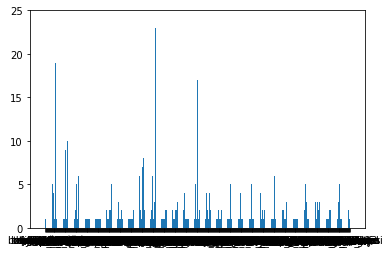

In [66]:
import pylab as pl
import numpy as np

X = np.arange(len(edge_dict))
pl.bar(X, edge_dict.values(),align='center', width=0.5)
pl.xticks(X, edge_dict.keys())
pl.ylim(0, 25)
pl.show()

#### What can you learn from the degree distribution?


Lots of nodes(users) have degree less than 5(or 10)... These users are more likely to be individual users; however, for nodes with high degree (over 10), users are more likely to be public accounts or news accounts.

### 2-C

In [67]:
# import operator
# #edge_dict=nx.degree(redsoxGraph)
# sorted_x = sorted(edge_dict.items(), key=operator.itemgetter(1), reverse=True)

In [130]:
# sorted_x[:5]

In [131]:
EDGE = redsoxGraph.edges(data = True)
sorted(EDGE, key=lambda weight: weight[2]['numberMentions'], reverse=True)[:5]

[('anabell39', 'mousavi1388', {'numberMentions': 4}),
 ('gita', 'grahattalab', {'numberMentions': 4}),
 ('psiphoninc', 'psiphoninc', {'numberMentions': 3}),
 ('jslefanu', 'potent_one', {'numberMentions': 3}),
 ('stopahmadi', 'andrewfynn', {'numberMentions': 3})]

### 2-D

In [70]:
import colorlover as cl
from IPython.display import HTML
HTML(cl.to_html( cl.scales['9'] ))

In [154]:
# map purd color scale to 300 cells
YlGn = cl.scales['9']['seq']['YlOrRd']
YlGnBu300 = cl.interp(YlGn, 300)
HTML(cl.to_html(YlGnBu300))

In [155]:
YlGn = cl.scales['9']['seq']['YlGnBu']
YlGnBu30 = cl.interp(YlGn, 9)
HTML(cl.to_html(YlGnBu30))

In [72]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph,"pos", posDict)

addRandomPositions(redsoxGraph)

In [132]:
def plotNetwork(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=edgeWidth ,color='#888'))
        scatters.append(s)

    for node in graph.nodes():
        xPos, yPos = graph.node[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='marker', 
                marker=dict(
                    color="#888", 
                    size=10,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [143]:
#plotNetwork(redsoxGraph)

In [144]:
def applyLayout(graph, layoutFunc):
    posDict = layoutFunc(graph) 
    nx.set_node_attributes(graph, "pos", posDict)

In [145]:
redsoxGraphCircular = redsoxGraph.copy()
applyLayout(redsoxGraphCircular, nx.circular_layout)
plotNetwork(redsoxGraphCircular)

In [136]:
redsoxGraphSpring = redsoxGraph.copy()
applyLayout(redsoxGraphSpring, nx.spring_layout)
plotNetwork(redsoxGraphSpring)

In [156]:
def plotNetworkSizeColor(graph):

    mximum= max(nx.number_of_cliques(redsoxGraph).values())
    mnimum=min(nx.number_of_cliques(redsoxGraph).values())
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        nodeColor = int(8*(edgeWidth-mnimum)/(mximum-mnimum))
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=edgeWidth ,color=YlGnBu30[nodeColor]))
        scatters.append(s)

    for node in graph.nodes():
        xPos, yPos = graph.node[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='marker', 
                marker=dict(
                    color="#888", 
                    size=10,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [157]:
plotNetworkSizeColor(redsoxGraph)

## 3

In [81]:
tw_redsoxTag= redsoxTag.loc[:, "tweet"].as_matrix()

In [102]:
import nltk
import re
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.corpus import stopwords
stopwords = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Himeh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Himeh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Himeh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Himeh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [166]:
# Top-k frequent terms
counter = Counter()
stopwords.append('tweet')
stopwords.append('name')
stopwords.append('dtype')
stopwords.append('object')
stopwords.append('rt')
stopwords.append('iran')
stopwords.append('tehran')
stopwords.append('series')
stopwords.append('breakingtweets')
stopwords.append('http')
stopwords.append('https')
stopwords.append('gita')
stopwords.append('rt')
stopwords.append('iran')
stopwords.append('tehran')
stopwords.append('iranian')

stopwords.append('com')
stopwords.append('www')
stopwords.append('tweets')
stopwords.append('please')
stopwords.append('2009')
stopwords.append('bbc')
stopwords.append('via')
stopwords.append('first')
stopwords.append('twitpic')
stopwords.append('iran09')
stopwords.append('org')



for review in tw_redsoxTag:
        counter.update([word.lower() 
                        for word 
                        in re.findall(r'\w+', review) 
                        if word.lower() not in stopwords and len(word) > 2])
topk = counter.most_common(50)        

In [167]:
topk

[('iranelection', 573),
 ('bit', 236),
 ('mousavi', 166),
 ('police', 107),
 ('cnnfail', 104),
 ('twitter', 78),
 ('tinyurl', 61),
 ('election', 55),
 ('newiran', 55),
 ('word', 53),
 ('university', 52),
 ('blocked', 52),
 ('photos', 51),
 ('students', 50),
 ('attacked', 49),
 ('situation', 48),
 ('girls', 46),
 ('worrisome', 45),
 ('dormitory', 44),
 ('everything', 42),
 ('reported', 42),
 ('video', 40),
 ('dorms', 40),
 ('streets', 38),
 ('shattered', 38),
 ('wounded', 38),
 ('ahmadinejad', 35),
 ('iranelections', 35),
 ('twitterfall', 34),
 ('violence', 34),
 ('riots', 33),
 ('give', 33),
 ('1ada4m', 32),
 ('people', 31),
 ('protest', 31),
 ('escalates', 31),
 ('deaths', 30),
 ('cut', 28),
 ('communication', 26),
 ('new', 25),
 ('elections', 25),
 ('theneave', 25),
 ('got', 24),
 ('friend', 22),
 ('post', 20),
 ('stopahmadi', 20),
 ('lbt4o9', 19),
 ('show', 18),
 ('get', 18),
 ('sgourley', 18)]

#### provide a basc description of the main themes:

Most frequent words show that people who used #Tehran, tweet about election situation in Iran. In 2009 election, people had trouble to follow news and connect to social media, also they failed to send text messages. 
People mostly tweet about Iran situation in that time, and talking about new Iran if Mousavi becomes the president (Whoever they did not succeed!!)

### 3-b

In [168]:
def plotNetworkSizeColor(graph):
    closenessCentr = nx.closeness_centrality(redsoxGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    #stopwords = set(stopwords)

    stopwords.append('tweet')
    stopwords.append('name')
    stopwords.append('dtype')
    stopwords.append('object')
    stopwords.append('rt')
    stopwords.append('iran')
    stopwords.append('tehran')
    stopwords.append('series')
    stopwords.append('breakingtweets')
    stopwords.append('http')
    stopwords.append('https')
    stopwords.append('gita')
    stopwords.append('rt')
    stopwords.append('iran')
    stopwords.append('tehran')
    stopwords.append('iranian')
    stopwords.append('com')
    stopwords.append('www')
    stopwords.append('tweets')
    stopwords.append('please')
    stopwords.append('2009')
    stopwords.append('bbc')
    stopwords.append('via')
    stopwords.append('first')
    stopwords.append('twitpic')
    stopwords.append('iran09')
    stopwords.append('org')

    scatters=[]
    #counter = Counter()
    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=edgeWidth ,color='#888'))
        scatters.append(s)


    counter = Counter()
    for node in graph.nodes():
        a=redsoxTag[redsoxTag["user"]==node]["tweet"]
        counter.update([word.lower() 
                                for word 
                                in re.findall(r'\w+', str(a)) 
                                if word.lower() not in stopwords and len(word) > 2])
        topk = counter.most_common(3) 
#         wordCounter = Counter(list(a))
#         three=wordCounter.most_common(3)
        
#         tokens=[word for word in a]
#         list_of_words = [i.lower() for i in tokens if i.lower() not in stopwords.words('english')]
           
#         counter.update(list_of_words)
#         topk = counter.most_common(k)
#         counter.update([word.lower() #??????????????????????
#                         for word 
#                         in re.findall(r'\w+', a) 
#                         if word.lower() not in stopwords and len(word) > 2])
#         topk = counter.most_common(50)        


        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.node[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\n Top Words: %s" % (node, topk),
                hoverinfo='text',
                mode='marker', 
                marker=dict(
                    color=YlGnBu300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [169]:
plotNetworkSizeColor(redsoxGraph)

##### We could also add centrality measures in the hover inforation, which I did in the followig questions

In [117]:
counter = Counter()
for node in redsoxGraph.nodes():
    a=redsoxTag[redsoxTag["user"]==node]["tweet"]
    print (a)

181948    RT @BreakingTweets: BREAKING: SMS services in ...
182126    RT @BreakingTweets: BREAKING: SMS services in ...
Name: tweet, dtype: object
198805     #SMS system down in #Iran, hours before electi...
1472657    Live updates: #IranElection results | Latest #...
2643433    Violence escalates in #Iran, first deaths repo...
2830430    Featured TwitPic: Fire during protest in #Tehr...
Name: tweet, dtype: object
205631    @BreakingTweets #SMS system down in #Iran, hou...
Name: tweet, dtype: object
226518    RT @PsiphonInc Mousavi Supporters at Azadi Str...
Name: tweet, dtype: object
220709    Campaign.com: New role for Web in Iranian poli...
222103    SMS system down in Iran just hours before elec...
286597    NYT: In Iran, a Real Race, and Talk of a Sea C...
394205    RT @GumpB: RT @weddadyPara la mejor cobertura ...
394421    RT @weddady: Para la mejor cobertura de las el...
394834    RT @weddady: Pour la meilleure couverture twit...
Name: tweet, dtype: object
386911    RT @weddady

## 4

In [118]:
closeness_centrality=nx.closeness_centrality(redsoxGraph, u=None, distance=None, normalized=True)

In [119]:
betweenness_centrality=nx.betweenness_centrality(redsoxGraph, normalized=True)

### 4-B

In [120]:
def plotNetworkSizeColor(graph):

    closeness_centrality=nx.closeness_centrality(graph)
    maxCentr = max(closeness_centrality.values())
    minCentr = min(closeness_centrality.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = closeness_centrality[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.node[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\nCloseness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='marker', 
                marker=dict(
                    color=YlGnBu300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [121]:
plotNetworkSizeColor(redsoxGraph)

In [158]:
def plotNetworkSizeColorBetween(graph):

    betweenness_centrality=nx.betweenness_centrality(graph, normalized=True)
    maxCentr = max(betweenness_centrality.values())
    minCentr = min(betweenness_centrality.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = betweenness_centrality[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.node[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\n Betweeness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='marker', 
                marker=dict(
                    color=YlGnBu300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [159]:
plotNetworkSizeColorBetween(redsoxGraph)

### 4-C

#### Identify the key players in the mentioned graph based on the centrality measures.
1. Are the results similar or dierent? Explain what can be the reason for the observed
similarity or dierence.
2. What centrality measure produced more meaningful interpretation?

Gita user has the highest closseness and betweeness and degree. However, the centrality measures for betweeness, degree and closeness are different. 
The nodes with the highest closeness centrality are gita and Iran09 users, since they have the shortest paths to all other nodes. However, nodes which act more often as a bridge along the shortest path between two other nodes, has the highest betweeness. 

Accounts with higher betweeness are more in the center of attention since they are more likely to be public pages. And they could be more influential and relliable. If gita news source was removed from this network system, people may not be informed very much about the election situation in Iran.

## 5

In [126]:
#Returns the number of maximal cliques in G.
nx.graph_number_of_cliques(redsoxGraph)

569

In [171]:
#Returns the size of the largest maximal clique containing each given node.
#nx.node_clique_number(redsoxGraph)

#size of the largest clique
nx.graph_clique_number(redsoxGraph)

4

In [128]:
#Returns the number of maximal cliques for each node.
nx.number_of_cliques(redsoxGraph)

{'': 9,
 '1mohandes': 1,
 '21echoes': 1,
 '31spoonerstreet': 1,
 '7keystodeductit': 1,
 '_alexcar': 1,
 '_freya': 1,
 'abc': 1,
 'abdu': 1,
 'aceman808': 1,
 'acfoltzer': 1,
 'actionchick': 1,
 'adreier': 1,
 'advorec': 4,
 'aechenberg': 1,
 'aefpix': 1,
 'af3': 5,
 'akonsen': 1,
 'alazenby': 1,
 'alexlobov': 1,
 'alexruff': 1,
 'aliasa': 1,
 'allahpundit': 1,
 'altartist)': 1,
 'amadril': 7,
 'amadril)': 2,
 'amandagbeals': 1,
 'amerikeith': 1,
 'ammr': 1,
 'amrosario': 3,
 'amyjudd': 5,
 'amyvdh': 1,
 'anabell39': 6,
 'andrewfynn': 2,
 'andylovell': 1,
 'andyv67': 1,
 'anemosnaftilos': 1,
 'angelfly72': 1,
 'angie1234p': 1,
 'annabushueva': 1,
 'anotherside': 2,
 'anteekiran': 1,
 'april_itt': 4,
 'arealist': 2,
 'argyle13': 2,
 'aroundharlem': 1,
 'ataccini': 1,
 'atx4u': 1,
 'avmavm': 2,
 'awwsboss': 1,
 'babymonsterface': 1,
 'baharshahpar': 1,
 'bala_k': 1,
 'bantrybay': 1,
 'barbarahui': 1,
 'bbc': 1,
 'bedstuyblog': 1,
 'belindaang': 1,
 'belledame222': 2,
 'benjaminbirely': 4,

In [129]:
#Returns a list of cliques containing the given node.
nx.cliques_containing_node(redsoxGraph)

{'': [['', 'stopahmadi', 'mariabarrett'],
  ['', 'stopahmadi', 'janjohannesson'],
  ['', 'stopahmadi', 'jackimo'],
  ['', 'stopahmadi', 'argyle13'],
  ['', 'stopahmadi', 'sarahlee310'],
  ['', 'valharris'],
  ['', 'robot117'],
  ['', 'winston80', 'steve_schippert'],
  ['', 'rikycoh']],
 '1mohandes': [['1mohandes', 'roddee']],
 '21echoes': [['21echoes', 'your_tweet']],
 '31spoonerstreet': [['sgourley', '31spoonerstreet']],
 '7keystodeductit': [['7keystodeductit', 'lerey']],
 '_alexcar': [['_alexcar', 'anabell39']],
 '_freya': [['_freya', 'simonscotland']],
 'abc': [['abc', 'winston80']],
 'abdu': [['abdu', 'ammr']],
 'aceman808': [['aceman808', 'breakingtweets']],
 'acfoltzer': [['gita', 'acfoltzer']],
 'actionchick': [['wpxlse', 'actionchick']],
 'adreier': [['adreier', 'sgourley']],
 'advorec': [['jason_pollock', 'theyellowdart', 'advorec'],
  ['advorec', 'y_shar)', 'breakingtweets'],
  ['advorec', 'theyellowdart', 'mkoumarianos'],
  ['advorec', 'si_jose']],
 'aechenberg': [['aechenbe

#### 5-C- Provide some insights on the connectivity patterns of your mention graph based on the in-formation calculated in (a).

clique in a social network as a cohesive group of people that are tightly connected to each other (and not tightly connected to people outside the group)
A clique is defined as a maximal complete subgraph of a given graph—i.e., a group of people where everybody is connected directly to everyone else. 

'wpxlse' has the highest number of maximal cliques 38, that this user has received more mentions or mention people more.

Most users(nodes) has clique of one or two.

Also, maximal numbers of cliques in the graph is 569.